## Project - Unsupervised Learning

Submitted by: Dr. Shrishail S. Gajbhar as part of the "Unsupervised Learning" module project evaluation.

### Dataset Information:

**Name: vehicle.csv**

**Domain: Object Recognition**

**Aim: To classify a given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette.**

### Objective:
Apply dimensionality reduction technique – PCA and train a model using principle components instead of training the model using just the raw data.

### Learning Outcomes:

* Exploratory Data Analysis
* Reduce number dimensions in the dataset with minimal information loss
* Train a model using Principle Components

## About the dataset, column attributes (independent variables) and target variable (dependent variable)
The data contains features extracted from the silhouette of vehicles in different angles. Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars. 

**There are total 19 attributes in the dataset and in the context of the given problem, the target (or dependent) attribute is "class" whereas the remaining are independent attributes.**

**Attribute Information:**
* All the features are geometric features extracted from the silhouette.
* All are numeric in nature

**Attribute Names:**
1. compactness
2. circularity
3. distance_circularity
4. radius_ratio
5. pr.axis_aspect_ratio
6. max.length_aspect_ratio
7. scatter_ratio
8. elongatedness
9. pr.axis_rectangularity
10. max.length_rectangularity
11. scaled_variance
12. scaled_variance.1
13. scaled_radius_of_gyration
14. scaled_radius_of_gyration.1
15. skewness_about
16. skewness_about.1
17. skewness_about.2
18. hollows_ratio
19. class (**Target**)

##  Importing the necessary libraries and reading the dataset

In [1]:
# Importing the necessary libraries
import numpy as np #importing numpy library
import pandas as pd  # To read the dataset as dataframe
import seaborn as sns # For Data Visualization 
import matplotlib.pyplot as plt # Necessary module for plotting purpose
%matplotlib inline
from sklearn.model_selection import train_test_split # For train-test split
# getting method for accuracy score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC # For support vector machine based classifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Let us read the dataset
df_o = pd.read_csv('vehicle.csv')
# Let's make copy of the original datframe as df which we shall use further in this notebook
df = df_o.copy()
# Let's view first 5 rows of the dataset
df.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

**Observation:** Except the last column which our target attribute, remaining columns are numeric

In [3]:
# Before moving forward, let us see the distribution of target column..
df_t=df['class'].value_counts().to_frame()
df_t.columns=['count'] # renaming the column name
df_t.index.name = 'class' # renaming the index name
df_t['percentage'] = df_t['count']/df_t['count'].sum()*100 # Adding % column
df_t

count  percentage
class                   
car      429   50.709220
bus      218   25.768322
van      199   23.522459

Around 50% of obervations are for the 'car' while for 'bus' and 'van' the percentages are approximately 25% each.

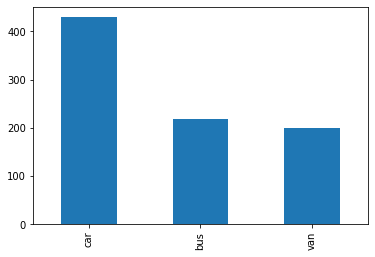

In [4]:
df['class'].value_counts().plot(kind='bar');

## 1) Data pre-processing

Here, we will perform all the necessary preprocessing on the data so that it is ready to be fed to an unsupervised algorithm such as PCA.

In [5]:
# Let us see shape of dataframe
df.shape

(846, 19)

There are total 846 rows and 19 columns (18 independent + 1 target/dependent)

In [6]:
# More information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

**Observations:** 
1. The datatypes of the columns are correct
2. There are few missing values in some of the columns
3. Most of the independent columns contain floating point numbers as they are measurement values

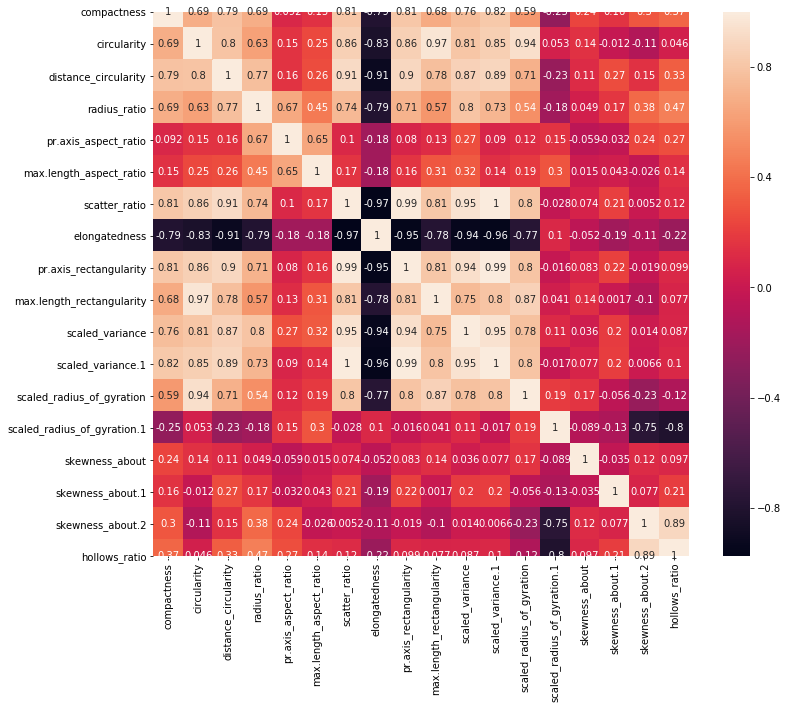

In [7]:
# Let us see how many of them are correlated..
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True)

Observations:
* Many columns have high correlation among themselves such as scaled_variance.1 and scatter_ratio, scaled_radius_of_gyration and circuilarity etc.
* High values of negative correlations can also be observed.
* Due to high correlation among the independent columns, direct application of classification algorithm on raw data will lead to *multicollinearity* thus overfitting the data.

In [8]:
# Let's see the which column pairs have high correlation among themselves?? (>.80)
c = df.corr().abs() # Since there may be positive as well as -ve correlation
s = c.unstack() # 
so = s.sort_values(ascending=False) # Sorting according to the correlation
so=so[(so<1) & (so>0.8)].drop_duplicates().to_frame() # Due to symmetry.. dropping duplicate entries.
so.columns = ['correlation']
so

correlation
scaled_variance.1           scatter_ratio                 0.996328
pr.axis_rectangularity      scaled_variance.1             0.992316
scatter_ratio               pr.axis_rectangularity        0.992078
                            elongatedness                 0.973504
circularity                 max.length_rectangularity     0.965729
scaled_variance.1           elongatedness                 0.956488
scaled_variance             scatter_ratio                 0.951672
pr.axis_rectangularity      elongatedness                 0.950405
scaled_variance             scaled_variance.1             0.949766
elongatedness               scaled_variance               0.938313
pr.axis_rectangularity      scaled_variance               0.938182
scaled_radius_of_gyration   circularity                   0.935950
distance_circularity        elongatedness                 0.913020
                            scatter_ratio                 0.907949
                            pr.axis_rectangularity        0.896273
hollows_ratio               skewness_about.2              0.893869
distance_circularity        scaled_variance.1             0.890541
max.length_rectangularity   scaled_radius_of_gyration     0.866554
scaled_variance             distance_circularity          0.865710
circularity                 scatter_ratio                 0.858265
pr.axis_rectangularity      circularity                   0.856603
scaled_variance.1           circularity                   0.850863
elongatedness               circularity                   0.827246
scaled_variance.1           compactness                   0.818674
compactness                 pr.axis_rectangularity        0.814248
pr.axis_rectangularity      max.length_rectangularity     0.813135
scatter_ratio               compactness                   0.812770
                            max.length_rectangularity     0.810017
circularity                 scaled_variance               0.806791
scaled_radius_of_gyration.1 hollows_ratio                 0.804793
scaled_radius_of_gyration   scatter_ratio                 0.800577

Observations: Following pairs of attributes have very high correlation among them (>=.95)
* scaled_variance.1 &	scatter_ratio
* pr.axis_rectangularity & scaled_variance.1
* scatter_ratio & pr.axis_rectangularity
* scatter_ratio & elongatedness
* circularity & max.length_rectangularity
* scaled_variance.1 & elongatedness
* scaled_variance & scatter_ratio
* pr.axis_rectangularity & elongatedness
* scaled_variance & scaled_variance.1

In [9]:
# Let us check the dataset for missing values
x=df.isnull().sum()
x=x[x>0] # Displaying columns having missing values > 0
x

circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
dtype: int64

Here, we will impute these missing values by mean of that column. Since, mean is pretty sensitive to outliers, let us first check and remove the outliers.. 

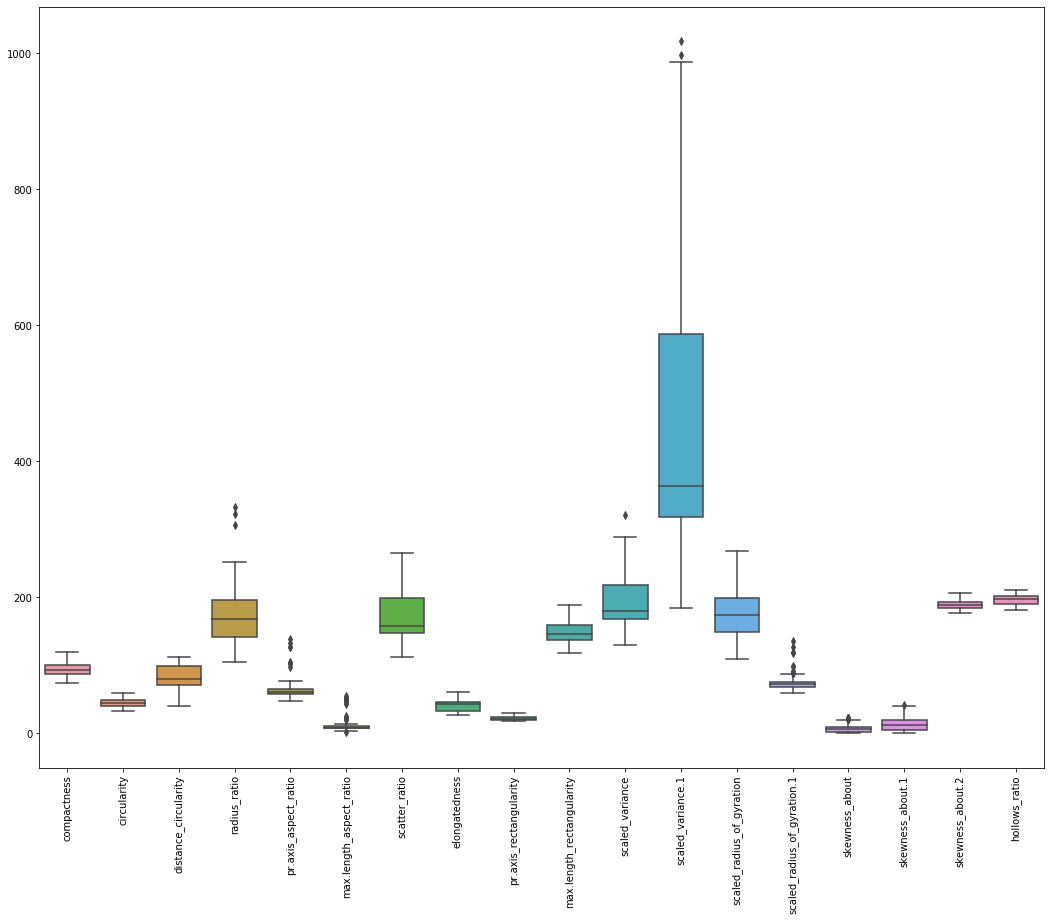

In [10]:
# To check presence of outliers
plt.figure(figsize=(18,14))
box = sns.boxplot(data=df)
box.set_xticklabels(labels=box.get_xticklabels(),rotation=90);

One can see that, following column attributes are affected by the outliers:
* radius_ratio (above third quartile)
* pr.axis_aspect_ratio (above third quartile)
* max_length_aspect_ratio (above third quartile and below first quartile)
* scaled_variance (above third quartile)
* scaled_variance.1 (above third quartile)
* scaled_radius_of_gyration.1  (above third quartile)   
* skewness_about (above third quartile)                
* skewness_about.1 (above third quartile)

In [11]:
# let us remove the outliers..
for column in df.columns.tolist():
    if column!='class': # except target column
        Q1 = df[column].quantile(.25) # 1st quartile
        Q3 = df[column].quantile(.75) # 3rd quartile
        IQR = Q3-Q1 # get inter quartile range
        # Replace elements of columns that fall below Q1-1.5*IQR and above Q3+1.5*IQR
        df[column].replace(df.loc[(df[column] > Q3+1.5*IQR)|(df[column] < Q1-1.5*IQR), column], df[column].median(),inplace=True)

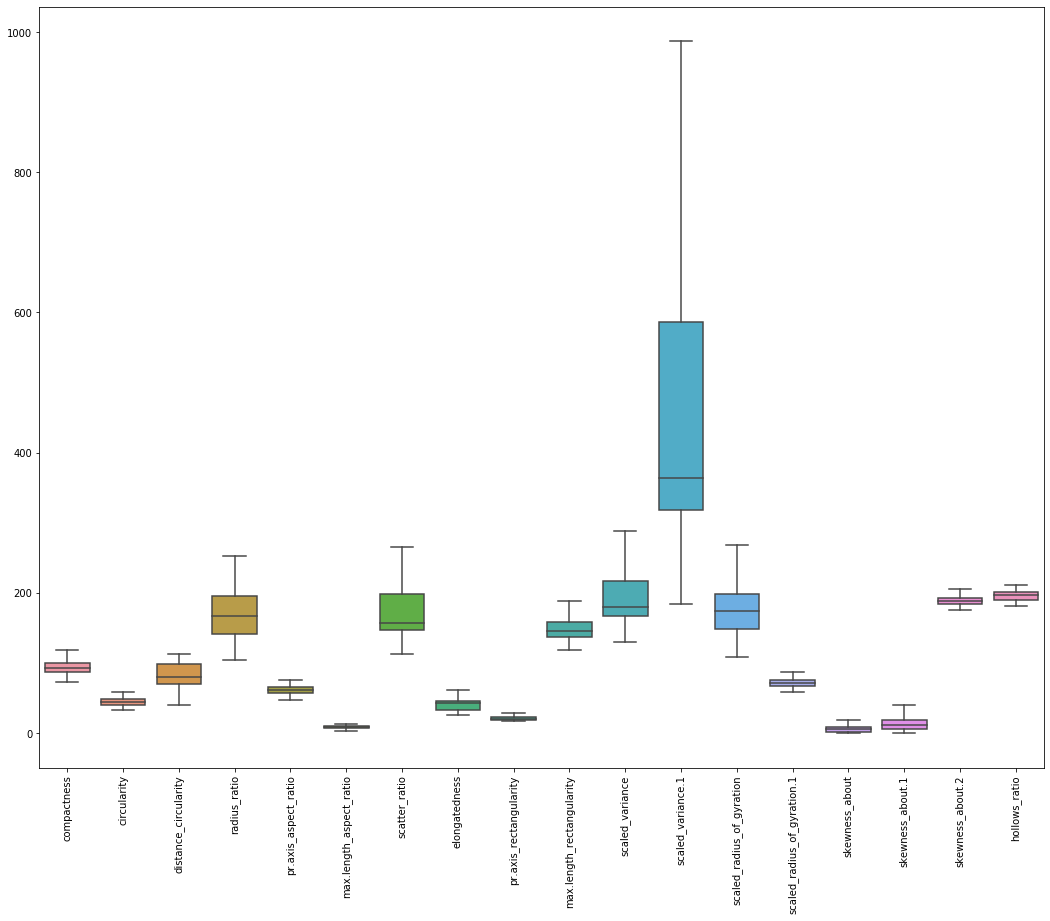

In [12]:
# Lets check whether outliers are removed or not??
plt.figure(figsize=(18,14))
box = sns.boxplot(data=df)
box.set_xticklabels(labels=box.get_xticklabels(),rotation=90);

**One can see from the above plot that the outliers are removed successfully from all of the independent numerical attributes.**

In [13]:
# Let us do the missing value imputation
from sklearn.impute import SimpleImputer
# Create object of SimpleImputer class
si = SimpleImputer(strategy='mean')
# get the names of the columns which have missing values
missing_col_names=x.index.values.tolist()
missing_col_names

['circularity',
 'distance_circularity',
 'radius_ratio',
 'pr.axis_aspect_ratio',
 'scatter_ratio',
 'elongatedness',
 'pr.axis_rectangularity',
 'scaled_variance',
 'scaled_variance.1',
 'scaled_radius_of_gyration',
 'scaled_radius_of_gyration.1',
 'skewness_about',
 'skewness_about.1',
 'skewness_about.2']

In [14]:
# Fit the SimpleImputer class object to the desired columns
si.fit(df[missing_col_names])
# Transform the missing value columns
df[missing_col_names] = si.transform(df[missing_col_names])

In [15]:
# Check whether missing values are successfully imputed?
df.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

**One can see that, missing values are successfully imputed.**

In [16]:
df.describe().T

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  846.0   44.828775    6.133943   33.0   40.00   
distance_circularity         846.0   82.110451   15.740902   40.0   70.00   
radius_ratio                 846.0  168.340476   32.147711  104.0  141.00   
pr.axis_aspect_ratio         846.0   61.155213    5.613452   47.0   57.00   
max.length_aspect_ratio      846.0    8.118203    2.064114    3.0    7.00   
scatter_ratio                846.0  168.901775   33.195188  112.0  147.00   
elongatedness                846.0   40.933728    7.811559   26.0   33.00   
pr.axis_rectangularity       846.0   20.582444    2.588326   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              846.0  188.463820   31.029126  130.0  167.00   
scaled_variance.1            846.0  437.966825  174.308509  184.0  318.25   
scaled_radius_of_gyration    846.0  174.709716   32.546223  109.0  149.00   
scaled_radius_of_gyration.1  846.0   71.945962    6.158776   59.0   67.00   
skewness_about               846.0    6.148810    4.572933    0.0    2.00   
skewness_about.1             846.0   12.566864    8.877301    0.0    5.00   
skewness_about.2             846.0  188.919527    6.152166  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%     75%    max  
compactness                   93.0  100.00  119.0  
circularity                   44.0   49.00   59.0  
distance_circularity          80.0   98.00  112.0  
radius_ratio                 167.0  194.75  252.0  
pr.axis_aspect_ratio          61.0   65.00   76.0  
max.length_aspect_ratio        8.0   10.00   13.0  
scatter_ratio                157.0  198.00  265.0  
elongatedness                 43.0   46.00   61.0  
pr.axis_rectangularity        20.0   23.00   29.0  
max.length_rectangularity    146.0  159.00  188.0  
scaled_variance              179.0  216.75  288.0  
scaled_variance.1            363.5  586.00  987.0  
scaled_radius_of_gyration    174.0  198.00  268.0  
scaled_radius_of_gyration.1   71.5   75.00   87.0  
skewness_about                 6.0    9.00   19.0  
skewness_about.1              11.0   19.00   40.0  
skewness_about.2             188.0  193.00  206.0  
hollows_ratio                197.0  201.00  211.0

**Five point summary shows the distributions for the independent attributes may be skewed**

In [17]:
# Let's cjheck the skewness
df.skew().sort_values(ascending=False)

scaled_variance.1              0.818362
pr.axis_rectangularity         0.772254
skewness_about.1               0.674131
skewness_about                 0.623903
scatter_ratio                  0.607629
scaled_variance                0.599702
scaled_radius_of_gyration.1    0.534049
compactness                    0.381271
scaled_radius_of_gyration      0.279647
circularity                    0.262584
max.length_rectangularity      0.256359
skewness_about.2               0.249468
pr.axis_aspect_ratio           0.161027
radius_ratio                   0.117794
distance_circularity           0.106837
max.length_aspect_ratio        0.090367
elongatedness                  0.047875
hollows_ratio                 -0.226341
dtype: float64

Observations:
* Distribition of most of the columns show positive skewness (long right tail)
* Distribution of hollows_ratio column shows negative skewness
* elongatedness, max. length_aspect_ratio columns have approx. symmetric distribution

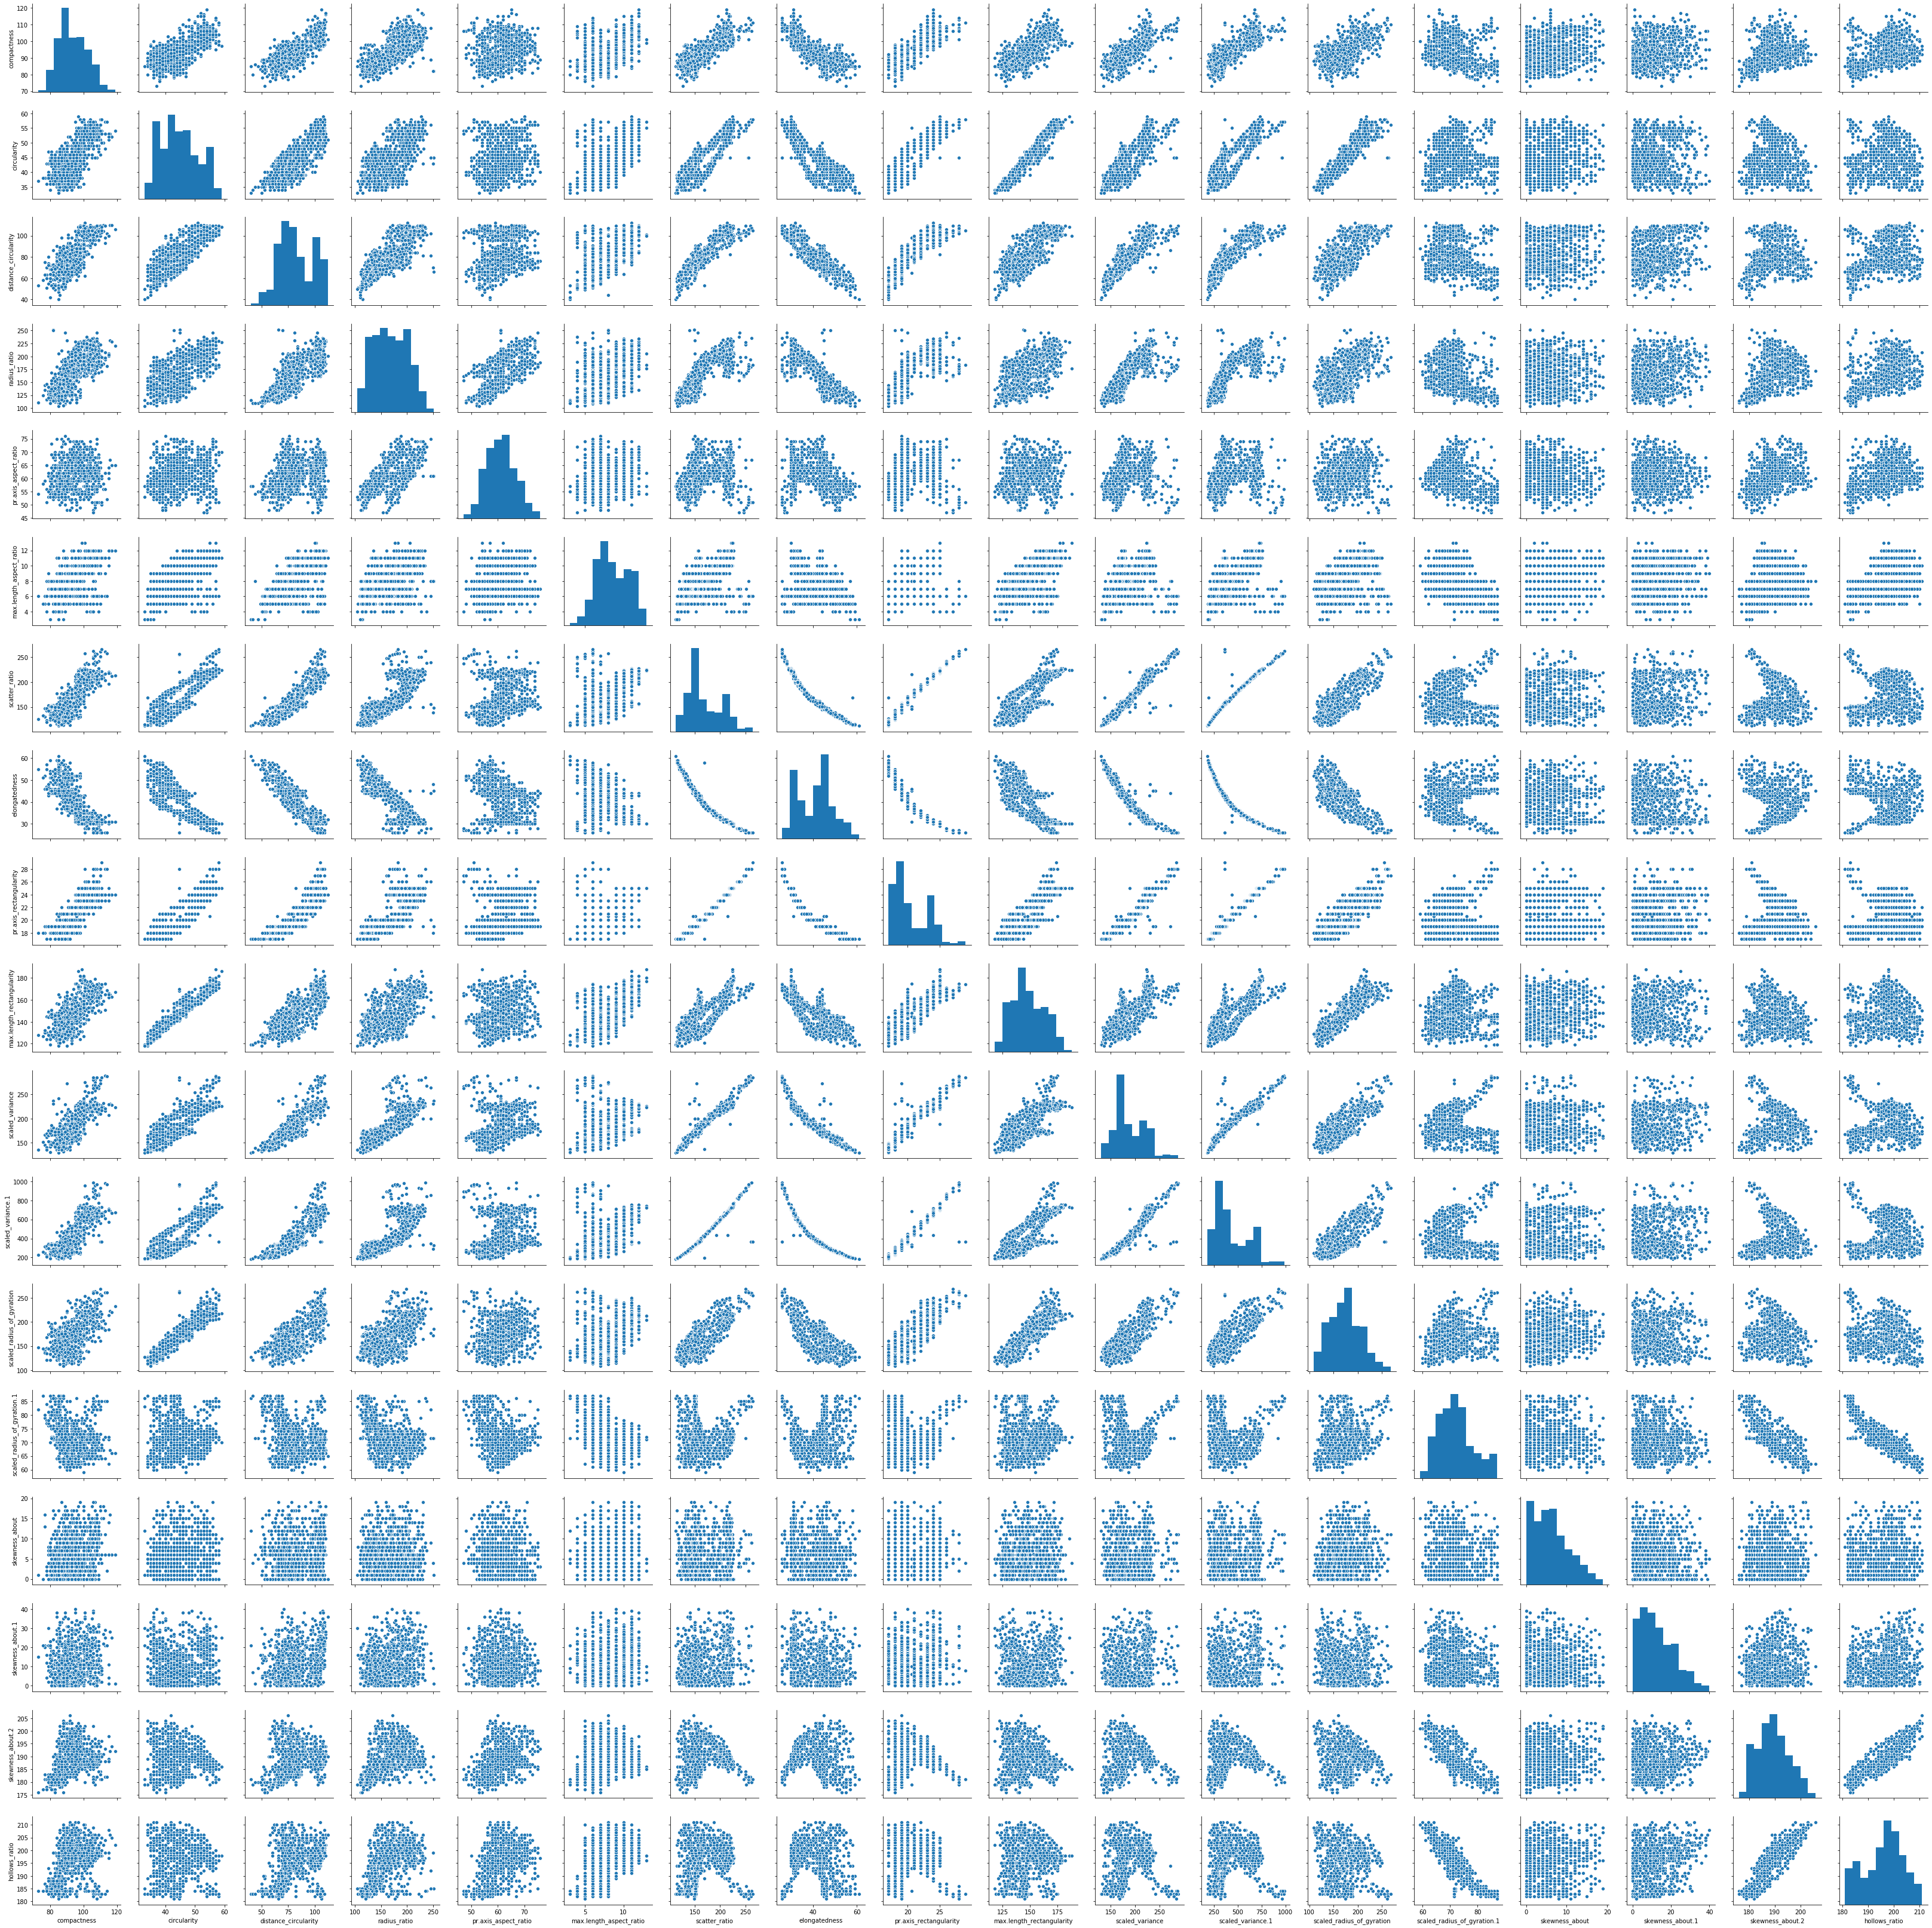

In [18]:
sns.pairplot(df)

It is clear that, there are many pairs of highly correlated column attributes in the dataset and some of them can be dropped from the dataset to avoid multicolinearity

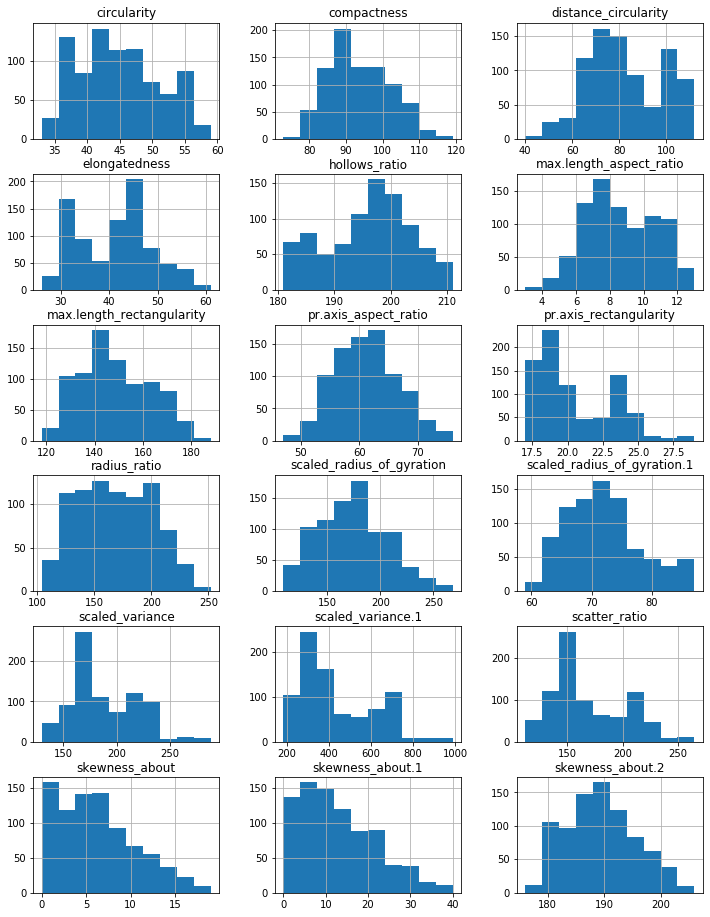

In [19]:
# Let's us only plot the distributions of independent attributes
df.drop('class',axis=1).hist(figsize=(12,16),layout=(6,3));

Frequency distributions (histograms) of most of the independent attributes are skewed

**Let us make the target variable numeric before proceeding further..**

In [20]:
df['class'] = df['class'].replace({'car':1,'bus':2,'van':3})

In [21]:
# For further analysis, let's separate independent and target attributes
y = df['class']
X = df.drop('class',axis=1)

## 2) Understanding the attributes - Find relationship between different attributes (Independent variables) and choose carefully which all attributes have to be a part of the analysis and why

**Undoubtedly, the present dataset is a potential candidate for dimensionality reduction techniques such as PCA, however it will give the reduced number of uncorrelated features in the transformed domain i.e., the new features will be linear combination of some the existing features. Before, applying PCA let us find out which are the important attributes regarding present analysis along with their validation.**

Let us start with **Univariate feature selection approaches**, We will use
* chi2 test
* f_classif
* mututal_info_classif

Then we will also use two more sophisticated approaches:
* RFE
* LASSO

In [22]:
from sklearn.feature_selection import chi2,f_classif,mutual_info_classif,RFE,SelectKBest

In [23]:
# Let us select 10 features usig SelectKBest with Chi square function
sel_chi2 = SelectKBest(chi2, k=10) 
X_chi2 = sel_chi2.fit_transform(X, y)

print(sel_chi2.get_support())

[False False  True  True False  True  True  True False False  True  True
  True False  True  True False False]


In [24]:
# Let us see which columns are important according to this test..
feat_chi2 = X.columns[sel_chi2.get_support()].tolist()
feat_chi2

['distance_circularity',
 'radius_ratio',
 'max.length_aspect_ratio',
 'scatter_ratio',
 'elongatedness',
 'scaled_variance',
 'scaled_variance.1',
 'scaled_radius_of_gyration',
 'skewness_about',
 'skewness_about.1']

In [25]:
# Let us see the correlation between these features..
c = df[feat_chi2].corr().abs()
s = c.unstack() # 
so = s.sort_values(ascending=False) # Sorting according to the correlation
so=so[(so<1) & (so>0.9)].drop_duplicates().to_frame() # Due to symmetry.. dropping duplicate entries.
so.columns = ['correlation']
so

correlation
scaled_variance.1    scatter_ratio            0.981200
elongatedness        scatter_ratio            0.970723
scaled_variance      scatter_ratio            0.960512
scaled_variance.1    elongatedness            0.950097
elongatedness        scaled_variance          0.947979
scaled_variance      scaled_variance.1        0.945134
elongatedness        distance_circularity     0.911435
distance_circularity scatter_ratio            0.904400

One can see that between these selected features also, there are 4 pairs of highly correlated (positive or negative) attributes. This indicates that use of simple univariate feature selection will not eleminate the problem o multicollinearity and hence overfitting in this case.

In [26]:
# Let us select 10 features usig SelectKBest with f_classif function
sel_fc = SelectKBest(f_classif, k=10) 
X_fc = sel_fc.fit_transform(X, y)
feat_fc = X.columns[sel_fc.get_support()].tolist()
feat_fc

['distance_circularity',
 'radius_ratio',
 'max.length_aspect_ratio',
 'scatter_ratio',
 'elongatedness',
 'pr.axis_rectangularity',
 'scaled_variance',
 'scaled_variance.1',
 'scaled_radius_of_gyration.1',
 'hollows_ratio']

In [27]:
# Let us select 10 features usig SelectKBest with f_classif function
sel_mutual = SelectKBest(mutual_info_classif, k=10)
X_mutual = sel_mutual.fit_transform(X, y)
feat_mutual = X.columns[sel_mutual.get_support()].tolist()
feat_mutual

['compactness',
 'distance_circularity',
 'radius_ratio',
 'max.length_aspect_ratio',
 'scatter_ratio',
 'elongatedness',
 'pr.axis_rectangularity',
 'scaled_variance',
 'scaled_variance.1',
 'scaled_radius_of_gyration']

#### Note: The univariate feature selection methods given above doesn't take into consideration the feature interactions among other features and hence they may select a redundant variable which is clear in case of chi2 analysis shown above.

#### Feature selection using RFE with Logistic regression model

In [28]:
# Let us select 10 features usig SelectKBest using RFE with Logistic regression model
model_logistic = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=1000)
sel_rfe_logistic = RFE(estimator=model_logistic, n_features_to_select=10, step=1)
X_rfe_logistic = sel_rfe_logistic.fit_transform(X, y)
feat_rfe = X.columns[sel_rfe_logistic.get_support()].tolist()
feat_rfe

['compactness',
 'circularity',
 'pr.axis_aspect_ratio',
 'max.length_aspect_ratio',
 'scatter_ratio',
 'elongatedness',
 'pr.axis_rectangularity',
 'max.length_rectangularity',
 'skewness_about.2',
 'hollows_ratio']

In [29]:
# Let us see the correlation between these features..
c = df[feat_rfe].corr().abs()
s = c.unstack() # 
so = s.sort_values(ascending=False) # Sorting according to the correlation
so=so[(so<1) & (so>0.9)].drop_duplicates().to_frame() # Due to symmetry.. dropping duplicate entries.
so.columns = ['correlation']
so

correlation
scatter_ratio             pr.axis_rectangularity     0.989370
elongatedness             scatter_ratio              0.970723
max.length_rectangularity circularity                0.961943
elongatedness             pr.axis_rectangularity     0.949077

#### RFE aproach seems to provide better features than chi2, since one can see there are only 4 feature pairs which are highly correlated (positive or negative)

In [30]:
# Let us create Dataframe showing all the important (10) features selected by these methods
df_uniFeat = pd.DataFrame({'chi2':feat_chi2,'f_classif':feat_fc,'mutual_info_classif':feat_mutual,'RFE':feat_rfe})
df_uniFeat

chi2                    f_classif  \
0       distance_circularity         distance_circularity   
1               radius_ratio                 radius_ratio   
2    max.length_aspect_ratio      max.length_aspect_ratio   
3              scatter_ratio                scatter_ratio   
4              elongatedness                elongatedness   
5            scaled_variance       pr.axis_rectangularity   
6          scaled_variance.1              scaled_variance   
7  scaled_radius_of_gyration            scaled_variance.1   
8             skewness_about  scaled_radius_of_gyration.1   
9           skewness_about.1                hollows_ratio   

         mutual_info_classif                        RFE  
0                compactness                compactness  
1       distance_circularity                circularity  
2               radius_ratio       pr.axis_aspect_ratio  
3    max.length_aspect_ratio    max.length_aspect_ratio  
4              scatter_ratio              scatter_ratio  
5              elongatedness              elongatedness  
6     pr.axis_rectangularity     pr.axis_rectangularity  
7            scaled_variance  max.length_rectangularity  
8          scaled_variance.1           skewness_about.2  
9  scaled_radius_of_gyration              hollows_ratio

#### Feature selection using LASSO with Logistic regression model

In [31]:
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
selection = SelectFromModel(LogisticRegression(C=1, penalty='l1'),max_features=10)
selection.fit(X, y)
selected_features = X.columns[(selection.get_support())].tolist()
selected_features

['compactness',
 'circularity',
 'pr.axis_aspect_ratio',
 'max.length_aspect_ratio',
 'scatter_ratio',
 'elongatedness',
 'pr.axis_rectangularity',
 'max.length_rectangularity',
 'skewness_about.2',
 'hollows_ratio']

In [32]:
# Adding the LASSO column to the selected features dataframe
df_uniFeat['LASSO'] = selected_features
df_uniFeat

chi2                    f_classif  \
0       distance_circularity         distance_circularity   
1               radius_ratio                 radius_ratio   
2    max.length_aspect_ratio      max.length_aspect_ratio   
3              scatter_ratio                scatter_ratio   
4              elongatedness                elongatedness   
5            scaled_variance       pr.axis_rectangularity   
6          scaled_variance.1              scaled_variance   
7  scaled_radius_of_gyration            scaled_variance.1   
8             skewness_about  scaled_radius_of_gyration.1   
9           skewness_about.1                hollows_ratio   

         mutual_info_classif                        RFE  \
0                compactness                compactness   
1       distance_circularity                circularity   
2               radius_ratio       pr.axis_aspect_ratio   
3    max.length_aspect_ratio    max.length_aspect_ratio   
4              scatter_ratio              scatter_ratio   
5              elongatedness              elongatedness   
6     pr.axis_rectangularity     pr.axis_rectangularity   
7            scaled_variance  max.length_rectangularity   
8          scaled_variance.1           skewness_about.2   
9  scaled_radius_of_gyration              hollows_ratio   

                       LASSO  
0                compactness  
1                circularity  
2       pr.axis_aspect_ratio  
3    max.length_aspect_ratio  
4              scatter_ratio  
5              elongatedness  
6     pr.axis_rectangularity  
7  max.length_rectangularity  
8           skewness_about.2  
9              hollows_ratio

Interestingly, LASSO and RFE methods give the same feature selections..

#### From the above analysis it is clear that, features selected by LASSO (or RFE) have to be the part of the analysis since they are marked as the important features by these methods. Also, for these subset of features we get minimum number of highly correlated (positive or negative) feature pairs (4 in this case).

In [33]:
c = df[selected_features].corr().abs()
s = c.unstack() # 
so = s.sort_values(ascending=False) # Sorting according to the correlation
so=so[(so<1) & (so>0.9)].drop_duplicates().to_frame() # Due to symmetry.. dropping duplicate entries.
so.columns = ['correlation']
so

correlation
scatter_ratio             pr.axis_rectangularity     0.989370
elongatedness             scatter_ratio              0.970723
max.length_rectangularity circularity                0.961943
elongatedness             pr.axis_rectangularity     0.949077

In [34]:
# Which are the common features selected by above methods??
fi1 = set(feat_chi2).intersection(set(feat_fc))
fi2 = fi1.intersection(set(feat_mutual))
fi3 = fi2.intersection(set(feat_rfe))
fi3

{'elongatedness', 'max.length_aspect_ratio', 'scatter_ratio'}

**elongatedness, max.length_aspect_ratio and scatter_ratio are the common features selected by the above feature selection methods**

## 3. Split the data into train and test (Suggestion: specify “random state” if you are using train_test_split from Sklearn) (5 marks)

We choose the random state to be: 32020 (current month and year)

In [35]:
# Let us split the data into 70:30 (train:test) proportion
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state = 32020)

In [36]:
# Let us standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

## 4. Train a Support Vector Machine using the train set and get the accuracy on the test set (10 marks)

In [37]:
# Very crude model (default constructor arguments, no cross validation)
# create model using constructor
SVMModel = SVC() # Calling default constructor
# fit the model to training set
SVMModel.fit(X_train_scaled,y_train)
# Predict the test data to get y_pred
y_pred = SVMModel.predict(X_test_scaled)
# get accuracy of model
svm_acc_score = accuracy_score(y_test,y_pred)
print("The accuracy of the model is {} %".format(svm_acc_score*100))

The accuracy of the model is 94.88188976377953 %


## 5) Perform K-fold cross validation and get the cross validation score of the model (10 marks)

In [38]:
from sklearn.model_selection import KFold, cross_val_score

In [39]:
splits=10 # Number of splits
kfold = KFold(n_splits=splits,random_state=2020)
scores = cross_val_score(SVC(),X_train_scaled,y_train, cv=kfold)
print('*****************************************************************************')
print("Cross validation scores for {}-fold split are: \n {} ".format(splits,scores))
print('*****************************************************************************')
print("Average cross validation score is {:.2f}% (std: {:.2f}%)".format(scores.mean()*100,scores.std()*100))

*****************************************************************************
Cross validation scores for 10-fold split are: 
 [0.95       0.93333333 0.96610169 0.96610169 0.91525424 0.98305085
 0.93220339 0.96610169 0.93220339 1.        ] 
*****************************************************************************
Average cross validation score is 95.44% (std: 2.51%)


### Let's see how much accuracy we get by applying SVM classifier on the important features given by LASSO (or RFE) method. Why??

Answer: The study would give us directions to choose the best approach if the dataset has highly correlated features and whether to go for
* feature Selection (Filter, Hybrid, Embedded methodssuch as chi2, lasso, rfe etc) or
* Dimensionality reduction (PCA, LDA)

In [40]:
df_sel = df[selected_features] # Only select the features given by LASSO
X_sel = df_sel.copy() 
y_sel = y.copy()

In [41]:
# Split in the train and test datasets
X_train_sel, X_test_sel, y_train_sel, y_test_sel = train_test_split(X_sel,y_sel,test_size=0.3,random_state = 32020)

In [42]:
# Scale the independent features..
scaler = StandardScaler()
X_train_sel_scaled = scaler.fit_transform(X_train_sel)
X_test_sel_scaled = scaler.fit_transform(X_test_sel)

In [43]:
## Applying SVM on the 10 selected features..(almost 50% dimensionality reduction)
# create model using constructor
SVMModel = SVC() # Calling default constructor
# fit the model to training set
SVMModel.fit(X_train_sel_scaled,y_train_sel)
# Predict the test data to get y_pred
y_pred_sel = SVMModel.predict(X_test_sel_scaled)
# get accuracy of model
svm_acc_score_sel = accuracy_score(y_test_sel,y_pred_sel)
print("The accuracy of the model is {} %".format(svm_acc_score_sel*100))

The accuracy of the model is 94.88188976377953 %


**One can see that the accuracy is same with 10 features..! It indicates that there are 8 redundant features in the dataset and have no influence on the model accuracy.**

Let's check accuracy using K-Fold cross validation in this case also.

In [44]:
scores = cross_val_score(SVC(),X_train_sel_scaled,y_train_sel, cv=kfold)
print('*****************************************************************************')
print("Cross validation scores for {}-fold split are: \n {} ".format(splits,scores))
print('*****************************************************************************')
print("Average cross validation score is {:.2f}% (std: {:.2f}%)".format(scores.mean()*100,scores.std()*100))

*****************************************************************************
Cross validation scores for 10-fold split are: 
 [0.96666667 0.95       0.96610169 0.96610169 0.94915254 0.94915254
 0.91525424 0.94915254 0.94915254 0.94915254] 
*****************************************************************************
Average cross validation score is 95.10% (std: 1.41%)


One can see that, k-fold cross validation accuracy in this case is slightly decreased.

**The 10 features selected using Lasso or RFE are good predictors of classes (car, van, bus).**

## 6) Use PCA from Scikit learn, extract Principal Components that capture about 95% of the variance in the data – (10 points)

In [45]:
from sklearn.decomposition import PCA
from scipy.stats import zscore 
X_scaled=X.apply(zscore)
X_scaled.head()

compactness  circularity  distance_circularity  radius_ratio  \
0     0.160580     0.517302              0.056545      0.300651   
1    -0.325470    -0.624564              0.120112     -0.850967   
2     1.254193     0.843549              1.518571      1.265520   
3    -0.082445    -0.624564             -0.007021     -0.290721   
4    -1.054545    -0.135193             -0.769817      1.141021   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              1.933071                 0.912212      -0.208038   
1             -0.740662                 0.427456      -0.599893   
2              0.863578                 0.912212       1.148382   
3              0.328831                 0.427456      -0.750606   
4             -0.027667                -0.057300      -0.599893   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0       0.136580               -0.225160                   0.758332   
1       0.520853               -0.611739                  -0.344578   
2      -1.144331                0.934576                   0.689401   
3       0.648945               -0.611739                  -0.344578   
4       0.520853               -0.611739                  -0.275646   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0        -0.401919          -0.338490                   0.285618   
1        -0.595400          -0.619767                  -0.513719   
2         1.113683           1.131039                   1.392391   
3        -0.917868          -0.740314                  -1.466773   
4         1.694126          -0.648469                   0.408593   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                    -0.316153       -0.032561          0.386961   
1                     0.008779        0.623862          0.161534   
2                     0.171245        1.717899         -0.402034   
3                    -1.453414       -0.032561         -0.289320   
4                    -0.072454        0.623862         -0.176607   

   skewness_about.2  hollows_ratio  
0         -0.312193       0.183957  
1          0.013088       0.452977  
2         -0.149552       0.049447  
3          1.639494       1.529056  
4         -1.450677      -1.699181

### Following analysis is used to find number of principal components required to extract about 95% variance of the data.

In [46]:
# Let is create PCA transformation object
pca_obj = PCA()
X_pca = pca_obj.fit_transform(X_scaled)
# X_pca is a n-dim numpy array, let's convert it into dataframe
df_pca = pd.DataFrame(X_pca,columns=['PrincipalComp-'+str(x) for x in range(1,X.shape[1]+1)])
df_pca.head()

PrincipalComp-1  PrincipalComp-2  PrincipalComp-3  PrincipalComp-4  \
0         0.582362        -0.675214        -0.454156        -0.750984   
1        -1.514094        -0.348887        -0.333632         1.268824   
2         3.911819         0.233754        -1.266134         0.137157   
3        -1.537496        -3.044207        -0.470794         0.324381   
4        -0.643433         1.487955        -0.245374        -0.551203   

   PrincipalComp-5  PrincipalComp-6  PrincipalComp-7  PrincipalComp-8  \
0        -0.775032        -1.849445        -0.182873        -0.684071   
1        -0.325936        -0.119688         0.202356         0.104649   
2         0.915656        -0.685346         0.811514         0.173760   
3        -0.613841         0.366091         0.117388        -0.195987   
4         0.473240        -1.012536         0.468391         1.270464   

   PrincipalComp-9  PrincipalComp-10  PrincipalComp-11  PrincipalComp-12  \
0         0.314183          0.137837         -0.264107         -0.050406   
1        -0.295992         -0.396914         -0.215726         -0.237347   
2         0.191409         -0.534662         -0.157581         -0.028678   
3        -0.389557          0.243307         -0.273247         -0.401412   
4         1.485148          0.045571          2.004813         -0.151529   

   PrincipalComp-13  PrincipalComp-14  PrincipalComp-15  PrincipalComp-16  \
0         -0.261131          0.020949          0.176892         -0.011520   
1          0.162973          0.022913          0.142969         -0.082832   
2          0.113703          0.066715         -0.072058         -0.086452   
3         -0.007675          0.111116          0.015006          0.134725   
4         -0.298212          0.532504          0.466802         -0.182732   

   PrincipalComp-17  PrincipalComp-18  
0          0.072720          0.012699  
1          0.054293         -0.002640  
2          0.089909          0.101269  
3         -0.120114         -0.044326  
4         -0.157413         -0.109108

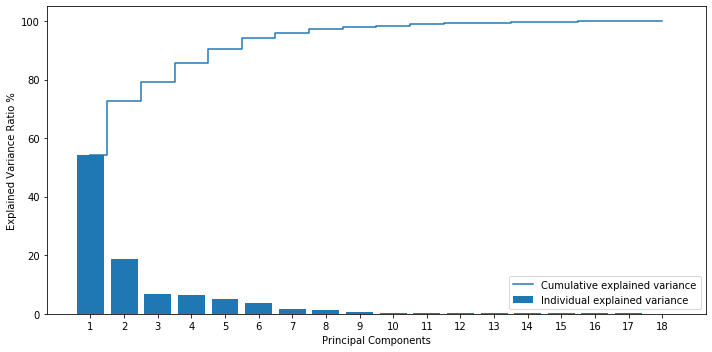

In [47]:
# Let's see how much variance is explained by each principal components in percentage
var_exp = pca_obj.explained_variance_ratio_*100
cum_var_exp = np.cumsum(var_exp)
x = range(1, X.shape[1] + 1)
plt.figure(figsize=(10 , 5))
plt.bar(x, var_exp, label = 'Individual explained variance')
plt.step(x, cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio %')
plt.xlabel('Principal Components')
plt.xticks(x, [str(i) for i in x])
plt.legend(loc = 'best')
plt.tight_layout()

In [48]:
cum_var_exp

array([ 54.11863847,  72.71750143,  79.33494235,  85.62657067,
        90.52991557,  94.22607798,  95.98910591,  97.25373833,
        97.97742728,  98.4200483 ,  98.82436347,  99.18219017,
        99.40248163,  99.57689366,  99.73924379,  99.86181018,
        99.96689957, 100.        ])

**One can see that, about 7 principal components are required to explain the 95% variance of the dataset.**

## 7) Repeat steps 3,4 and 5 but this time, use Principal Components instead of the original data. And the accuracy score should be on the same rows of test data that were used earlier. (hint: set the same random state) (10 marks)

In [49]:
pca = PCA(n_components=7)
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=7, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [50]:
print(sum(pca.explained_variance_ratio_*100))

95.98910591036918


**One can see that with 7 principal components the amount of variance explained is approx. 95%**

In [51]:
X_trans = pca.transform(X_scaled)
X_train, X_test, y_train, y_test = train_test_split(X_trans, y, test_size = 0.3, random_state = 32020)

In [52]:
# Very crude model (default constructor arguments, no cross validation)
# create model using constructor
SVMModel = SVC() # Calling default constructor
# fit the model to training set
SVMModel.fit(X_train,y_train)
# Predict the test data to get y_pred
y_pred = SVMModel.predict(X_test)
# get accuracy of model
svm_acc_score = accuracy_score(y_test,y_pred)
print("The accuracy of the model is {} %".format(svm_acc_score*100))

The accuracy of the model is 91.33858267716536 %


**One can see that with 7 principal components the accuracy is 91.33% which is still good as compared to the raw data accuracy of 94.88% with 18 features..!**

In [53]:
# Let's se the cross validation score
scores = cross_val_score(SVC(),X_train,y_train, cv=kfold)
print('*****************************************************************************')
print("Cross validation scores for {}-fold split are: \n {} ".format(splits,scores))
print('*****************************************************************************')
print("Average cross validation score is {:.2f}% (std: {:.2f}%)".format(scores.mean()*100,scores.std()*100))

*****************************************************************************
Cross validation scores for 10-fold split are: 
 [0.93333333 0.9        0.94915254 0.94915254 0.91525424 0.93220339
 0.86440678 0.91525424 0.93220339 0.93220339] 
*****************************************************************************
Average cross validation score is 92.23% (std: 2.41%)


Average cross validation score is 92.23% as compared to average cross validation score of 95.44% in case of raw data with 18 features.

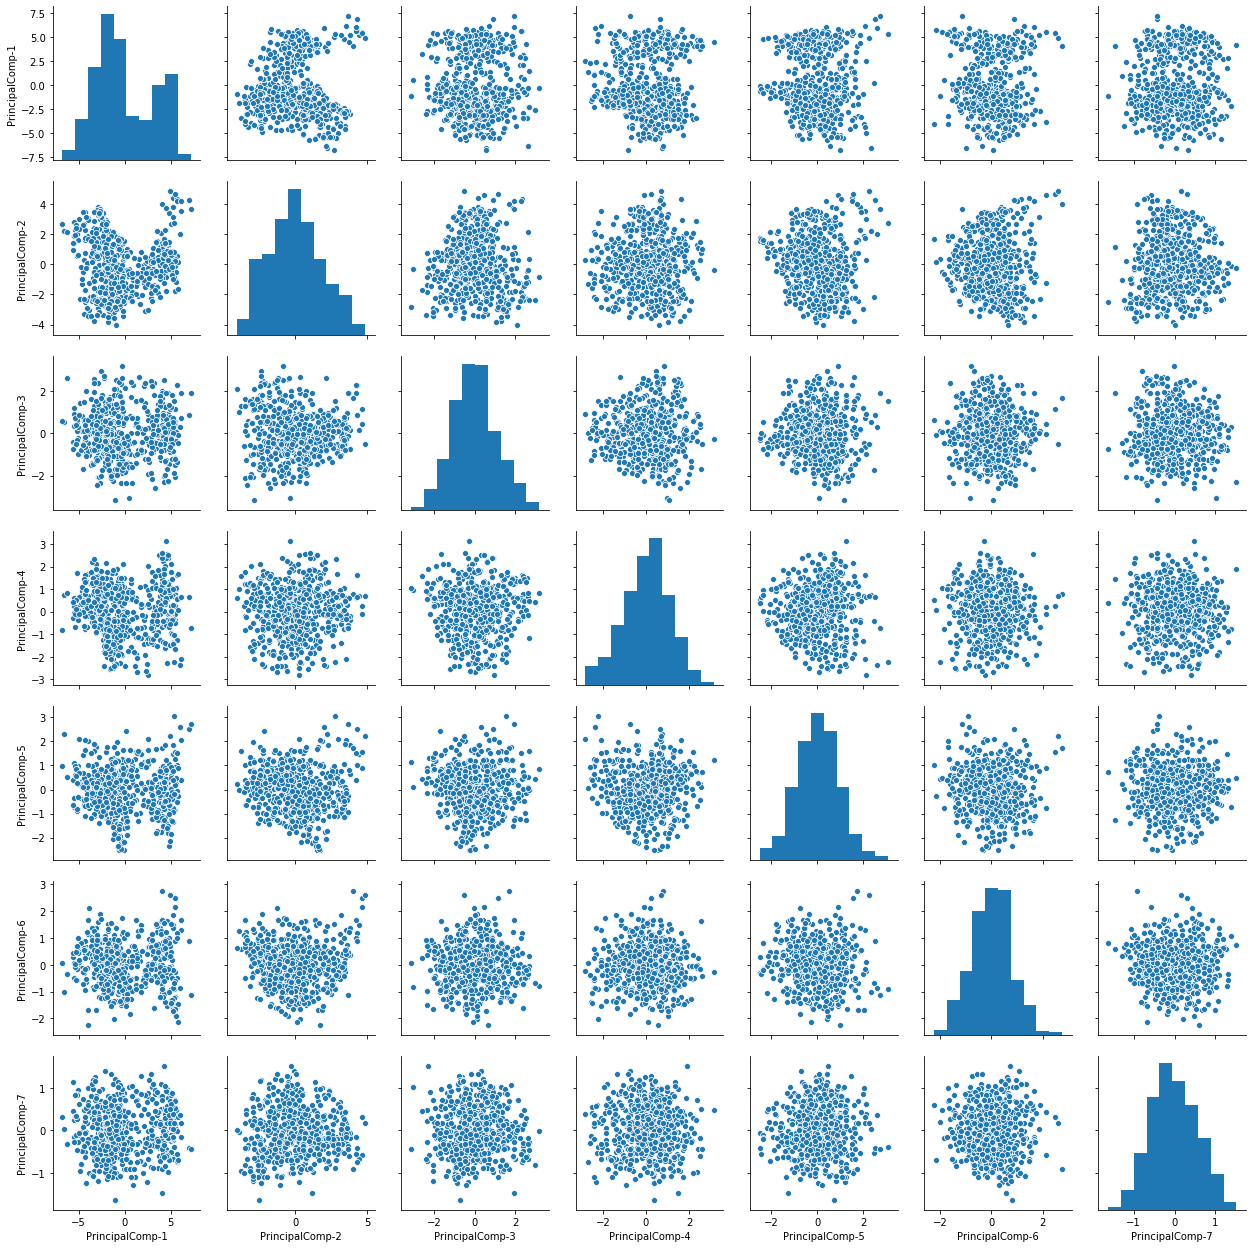

In [54]:
# Let's plot the pairplot between PCA transformed features
df_pca = pd.DataFrame(X_train,columns=['PrincipalComp-'+str(x) for x in range(1,X_train.shape[1]+1)])
sns.pairplot(df_pca)

**One can see that, the new features have no relationship among themselves**

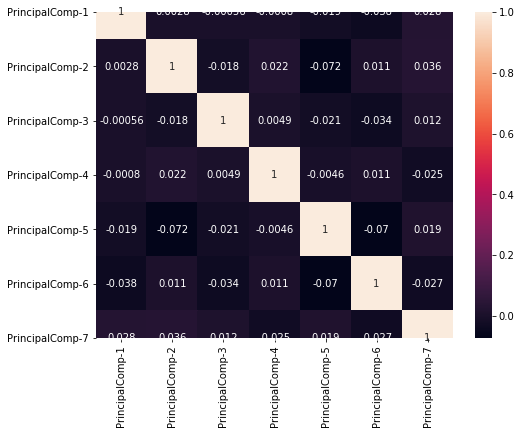

In [63]:
plt.figure(figsize=(8,6))
sns.heatmap(df_pca.corr(),annot=True);

**One can see that, the new features have no correlation among themselves**

### Let's see the model accuracy for number of principal components=1,2,3..18


In [55]:
Acc_sc = []
for i in range(1,X_scaled.shape[1]+1):
    print("Applying the PCA with #principal components = {}".format(i))
    pca = PCA(n_components=i)
    pca.fit(X_scaled)
    X_trans = pca.transform(X_scaled)
    X_train, X_test, y_train, y_test = train_test_split(X_trans, y, test_size = 0.3, random_state = 32020)
    # Very crude model (default constructor arguments, no cross validation)
    # create model using constructor
    SVMModel = SVC() # Calling default constructor
    # fit the model to training set
    SVMModel.fit(X_train,y_train)
    # Predict the test data to get y_pred
    y_pred = SVMModel.predict(X_test)
    # get accuracy of model
    svm_acc_score = accuracy_score(y_test,y_pred)
    Acc_sc.append(svm_acc_score*100)
    

Applying the PCA with #principal components = 1
Applying the PCA with #principal components = 2
Applying the PCA with #principal components = 3
Applying the PCA with #principal components = 4
Applying the PCA with #principal components = 5
Applying the PCA with #principal components = 6
Applying the PCA with #principal components = 7
Applying the PCA with #principal components = 8
Applying the PCA with #principal components = 9
Applying the PCA with #principal components = 10
Applying the PCA with #principal components = 11
Applying the PCA with #principal components = 12
Applying the PCA with #principal components = 13
Applying the PCA with #principal components = 14
Applying the PCA with #principal components = 15
Applying the PCA with #principal components = 16
Applying the PCA with #principal components = 17
Applying the PCA with #principal components = 18


In [56]:
df_results_final = pd.DataFrame({'NoOfPrincComps':[x for x in range(1,X.shape[1]+1)],'Accuracy Score (%)':Acc_sc})

In [57]:
df_results_final

NoOfPrincComps  Accuracy Score (%)
0                1           60.629921
1                2           67.716535
2                3           70.866142
3                4           77.952756
4                5           88.976378
5                6           90.157480
6                7           91.338583
7                8           93.700787
8                9           94.094488
9               10           94.094488
10              11           93.700787
11              12           94.881890
12              13           94.881890
13              14           94.881890
14              15           94.881890
15              16           94.488189
16              17           94.488189
17              18           94.881890

**One can see that model accuracy score is almost same for number of principal components greater than 11. Model with 9 principal components seems optimal in terms of accuracy as well as dimensionality reduction.**

## 8) Compare the accuracy scores and cross validation scores of Support vector machines – one trained using raw data and the other using Principal Components, and mention your findings (5 points)

In [58]:
df_compare = pd.DataFrame({'Data':['Raw Data with 18 features','PCA tranformed Data with 7 features'],'Accuracy Score (%)':[94.88,91.33],'Avg. CV Score (%)':[95.44,92.23]})
df_compare

Data  Accuracy Score (%)  Avg. CV Score (%)
0            Raw Data with 18 features               94.88              95.44
1  PCA tranformed Data with 7 features               91.33              92.23

**One can observe that, with raw data considering all the 18 features, the accuracy and average cross validation scores are 94.88 % and 95.44%, respectively. On the other hand,  with only 7 new features obtained using PCA transformation, we have good accuracy (91.33%) and average cross validation score (92.23%) with the advantage of having 60% dimensionality reduction..!**  